#Making_AI_Neural_Network_From_Scratch

#Part_1:- Data_Preprocessing

In [0]:
#import Relevant modules and libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [48]:
#import dataset
from google.colab import files
uploaded=files.upload()

Saving a.csv to a (1).csv


In [49]:
import io

df=pd.read_csv(io.BytesIO(uploaded["a.csv"]))
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [0]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [51]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [53]:
x.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

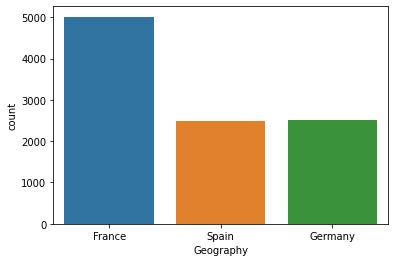

In [54]:
sn.countplot(x.Geography)

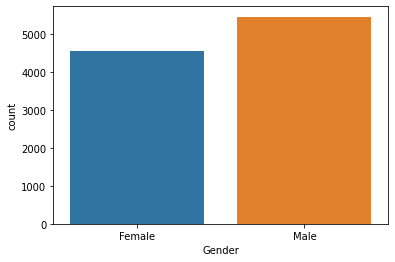

In [55]:
sn.countplot(x.Gender)

In [56]:
# Create_Dummies

geo=pd.get_dummies(x.Geography,drop_first=True)
gen=pd.get_dummies(x.Gender,drop_first=True)
print(geo)
print(gen)

      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]
      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


In [0]:
#Contatenation_the_dataframe
x=pd.concat([x,geo,gen],axis=1)

In [58]:
#Drop_Uneccessary_Columns
x=x.drop(["Geography","Gender"],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [0]:
#Train_Test_Spilit
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [60]:
x_train.shape

(8000, 11)

In [61]:
x_test.shape

(2000, 11)

#Feature_Enggineering

In [0]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [63]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

#Part 2_Let's_Make_Artificial_Neural_Network

In [0]:
#import Relevant Modules

import keras

from keras.models import Sequential
from keras.layers import Dense


In [0]:
#intialize_ANN
#Adding_the_Input_Layer_And_First_Hidden_Layer

clf=Sequential()

clf.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",input_dim=11))

# Add_Second_layer

clf.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))

#Add_Output_Layer
clf.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

#Compile_ANN

clf.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


#Fitting_ANN_To_Traing_Dataset

In [73]:
clf.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=10,shuffle=True)

Train on 5359 samples, validate on 2641 samples
Epoch 1/10
5359/5359 [==============================] - 1s 147us/step - loss: 0.4225 - accuracy: 0.7962 - val_loss: 0.4384 - val_accuracy: 0.7955
Epoch 2/10
5359/5359 [==============================] - 1s 141us/step - loss: 0.4201 - accuracy: 0.7962 - val_loss: 0.4374 - val_accuracy: 0.7955
Epoch 3/10
5359/5359 [==============================] - 1s 138us/step - loss: 0.4182 - accuracy: 0.7962 - val_loss: 0.4356 - val_accuracy: 0.7955
Epoch 4/10
5359/5359 [==============================] - 1s 143us/step - loss: 0.4155 - accuracy: 0.7962 - val_loss: 0.4341 - val_accuracy: 0.7955
Epoch 5/10
5359/5359 [==============================] - 1s 140us/step - loss: 0.4130 - accuracy: 0.7962 - val_loss: 0.4327 - val_accuracy: 0.7955
Epoch 6/10
5359/5359 [==============================] - 1s 141us/step - loss: 0.4104 - accuracy: 0.8044 - val_loss: 0.4304 - val_accuracy: 0.8084
Epoch 7/10
5359/5359 [==============================] - 1s 142us/step - loss

In [67]:
#Summay
clf.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [88]:
clf.history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

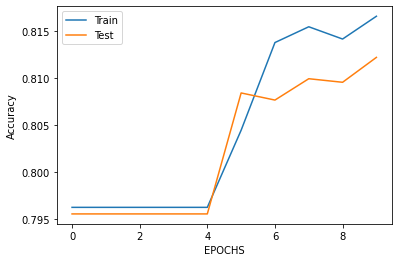

In [92]:
#Summarize_History_for-accuracy

plt.plot(clf.history.history["accuracy"])
plt.plot(clf.history.history["val_accuracy"])
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend(["Train","Test"])

#Part_3 Making_Prediction_&_Evaluating_the_model

In [0]:
#Predicting test result

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [98]:
yp=clf.predict(x_test)
yp=yp>0.5
yp

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Text(69.0, 0.5, 'Truth')

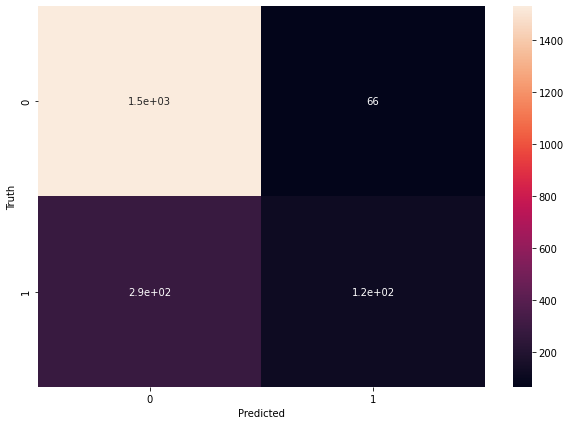

In [99]:
#Making_Confusion_Metrics

cm=confusion_matrix(y_test,yp)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [100]:
print(accuracy_score(y_test,yp))

0.8235


In [101]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1595
           1       0.64      0.29      0.40       405

    accuracy                           0.82      2000
   macro avg       0.74      0.62      0.65      2000
weighted avg       0.80      0.82      0.80      2000

